---------------------------------------

## Project II - Galaxy Shape Classification

Arnab Roy,
Brandon Welsh,
Sunny Kiluvia

February 2024

--------------------

## Loading in the data

In [1]:
# Import required dependencies
import matplotlib.pyplot as plt

# NOTE the following comes from the file downloaded from https://github.com/mwalmsley/galaxy_mnist
from galaxy_mnist import GalaxyMNIST

In [2]:
# There are 10,000 images total. 80% of them (8,000) are for training.
# Load training data
df_galaxy_TRAIN = GalaxyMNIST(
    ##root='/home/walml/repos/galaxy_mnist/download_root',
    root='Resources/walml/repos/galaxy_mnist/download_root',
    download=True,
    train=True  # True by default, or False for canonical test set
)

In [3]:
# There are 10,000 images total. 20% of them (2,000) are for testing.
# Load testing data
df_galaxy_TEST = GalaxyMNIST(
    root='Resources/walml/repos/galaxy_mnist/download_root',
    download=True,
    train=False  # False for canonical test set
)

-------------

## Exploring the Data

Dataset GalaxyMNIST
    Number of datapoints: 8000
    Root location: Resources/walml/repos/galaxy_mnist/download_root
    Split: Train


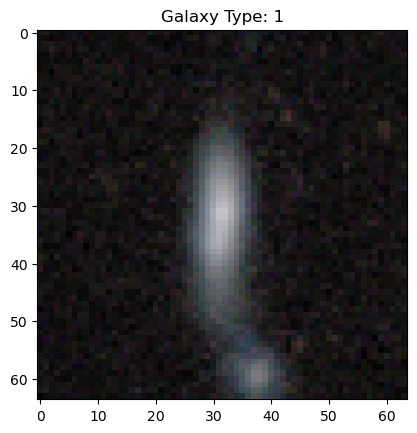

In [4]:
# Show training data
print(df_galaxy_TRAIN)

# Get the first image from the training set and its label
image, label = df_galaxy_TRAIN[0]

# Plot the image as an example
plt.imshow(image, cmap='gray')
plt.title(f'Galaxy Type: {label}')
plt.show()

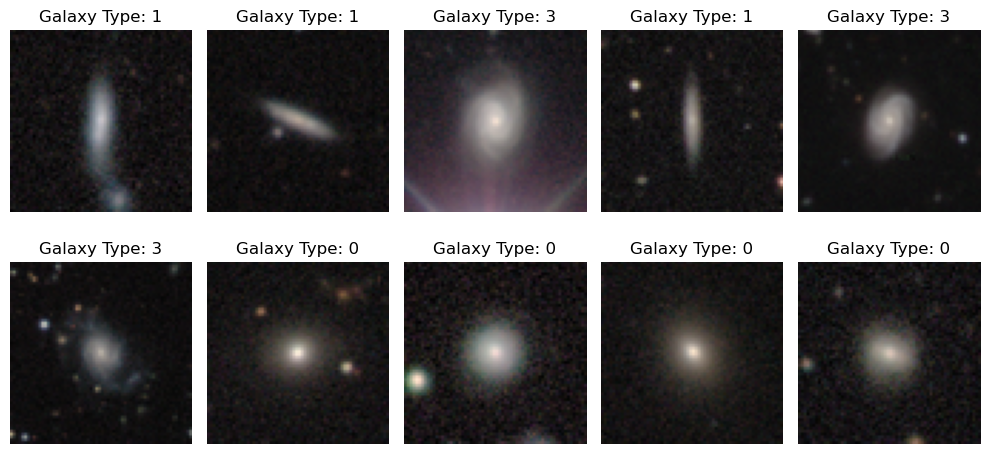

In [5]:
# I want to see the first 10 images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))

# Display the first 10 images from the training set
for i in range(10):
    image, label = df_galaxy_TRAIN[i]
    ax = axes[i//5, i%5]
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Galaxy Type: {label}')
    ax.axis('off')

plt.tight_layout()
plt.show()

Dataset GalaxyMNIST
    Number of datapoints: 2000
    Root location: Resources/walml/repos/galaxy_mnist/download_root
    Split: Test


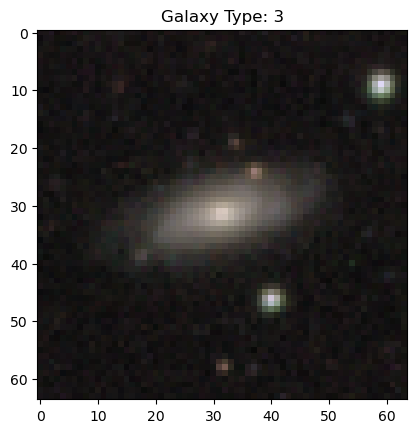

In [6]:
# Show testing data
print(df_galaxy_TEST)

# Get the first image from the testing set and its label
image, label = df_galaxy_TEST[0]

# Plot the image as an example
plt.imshow(image, cmap='gray')
plt.title(f'Galaxy Type: {label}')
plt.show()

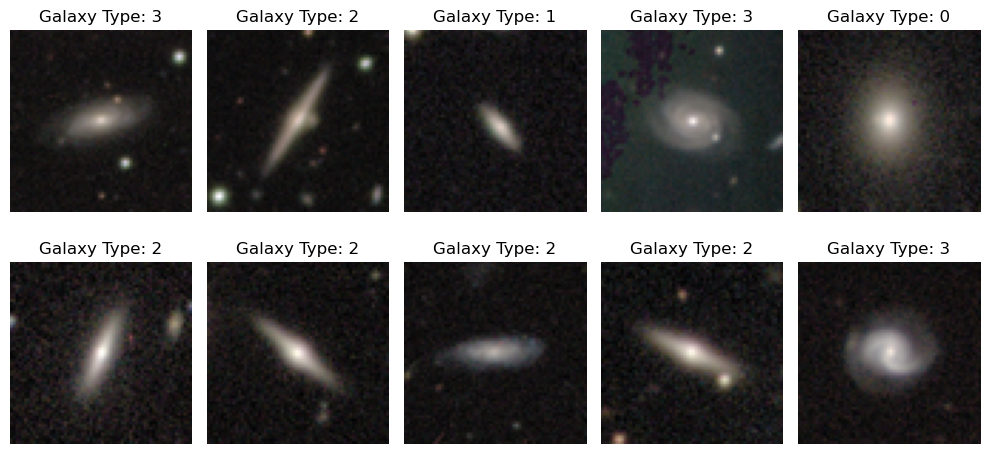

In [7]:
# I want to see the first 10 images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))

# Display the first 10 images from the training set
for i in range(10):
    image, label = df_galaxy_TEST[i]
    ax = axes[i//5, i%5]
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Galaxy Type: {label}')
    ax.axis('off')

plt.tight_layout()
plt.show()

-----------------------------------------------------

## Data Preparation

In [8]:
import numpy as np

# Initialize empty lists for the features and labels
X_train = []
y_train = []
X_test = []
y_test = []

# Loop over the training set and add each image and label to X_train and y_train
for image, label in df_galaxy_TRAIN:
    # Flatten the image to a 1D array
    X_train.append(np.array(image).flatten())
    y_train.append(label)

# Loop over the test set and add each image and label to X_test and y_test
for image, label in df_galaxy_TEST:
    # Flatten the image to a 1D array
    X_test.append(np.array(image).flatten())
    y_test.append(label)

# Now, X_train, y_train, X_test, and y_test are lists which contain flattened 
# images and labels for the training and testing data

# convert to numpy arrays to improve performance
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

----------------------------

## Classification Models

---------------------------

## Gradient Boosting Classifier
Brandon Welsh

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

# Train the Gradient Boosting classifier
clf = GradientBoostingClassifier(random_state=42).fit(X_train[0:100], y_train[0:100])

# Evaluate the model
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 0.4065
Testing Score: 0.41


## Adaptive Boosting Classifier
Brandon Welsh

In [13]:
from sklearn.ensemble import AdaBoostClassifier

# Train the AdaBoost classifier
clf = AdaBoostClassifier(random_state=42).fit(X_train[0:100], y_train[0:100])

# Evaluate the model
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 0.323875
Testing Score: 0.323
